In [1]:
# Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 13.9MB/s]


In [3]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [4]:
print(df.shape)

(180, 9)


In [5]:
#df.describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.head(1)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112


In [7]:
#checking datatypes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
##Checking for duplicate data points
duplicate = df[df.duplicated()]
duplicate

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


There is no scrap available in the dataset.

In [9]:
#number of unique values in our data
for i in df.columns:
  print(i, ': ', df[i].nunique())

Product :  3
Age :  32
Gender :  2
Education :  8
MaritalStatus :  2
Usage :  6
Fitness :  5
Income :  62
Miles :  37


In [10]:
#checking null values in every column of our data
df.isnull().sum()
##We could see the same in df.info() as well.

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

***Checking for distribution of various variables.***

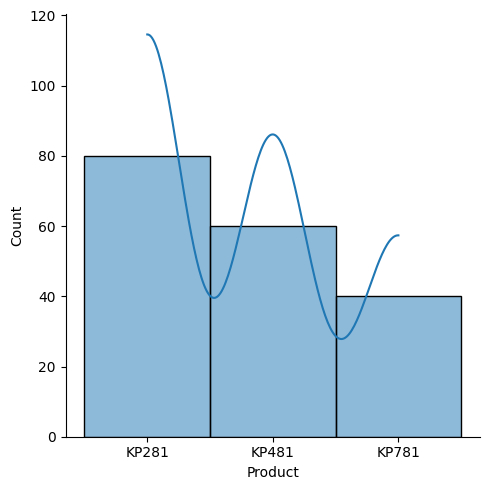

In [11]:
sns.displot(df, x="Product", kde = True)
plt.show()

In [12]:
print(df['Age'].min())
print(df['Age'].max())

18
50


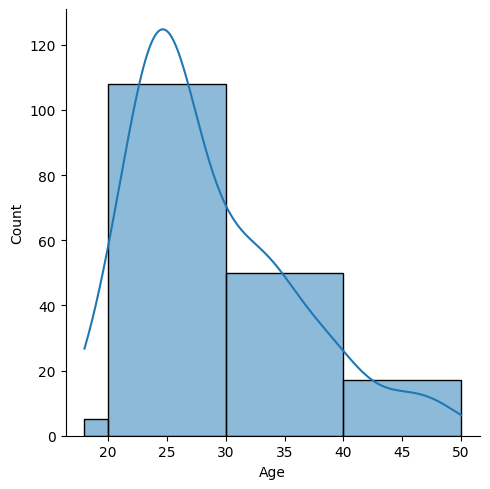

In [13]:
bin = [18, 20, 30, 40, 50]
sns.displot(df, x="Age", bins = bin, kde = True)
plt.show()

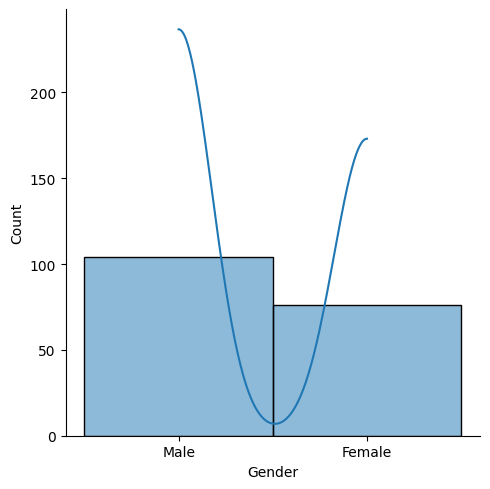

In [14]:
sns.displot(df, x="Gender", kde = True)
plt.show()

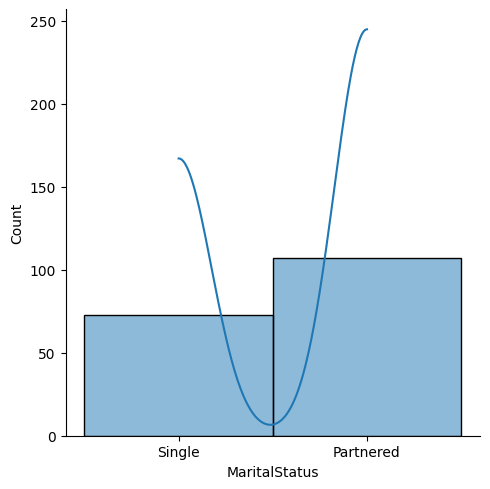

In [15]:
sns.displot(df, x="MaritalStatus", kde = True)
plt.show()

In [16]:
print(df['Usage'].min())
print(df['Usage'].max())

2
7


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


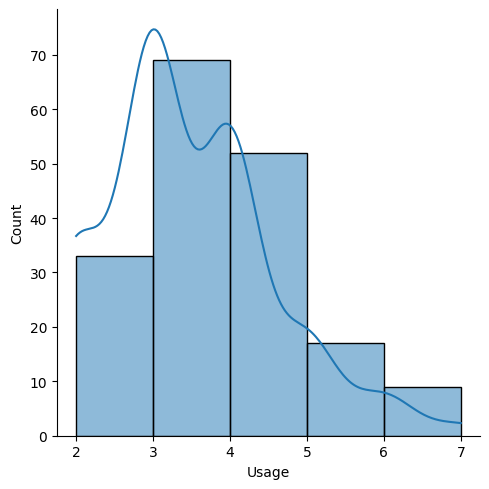

In [18]:
bin = [2, 3, 4, 5, 6, 7]
sns.displot(df, x="Usage", bins= bin, kde = True)
plt.show()

In [19]:
print(df['Fitness'].min())
print(df['Fitness'].max())

1
5


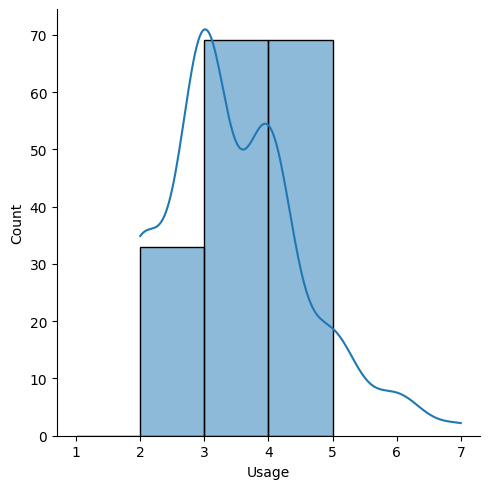

In [20]:
bin = [1, 2, 3, 4, 5]
sns.displot(df, x="Usage", bins = bin, kde = True)
plt.show()

In [21]:
print(df['Income'].min())
print(df['Income'].max())

29562
104581


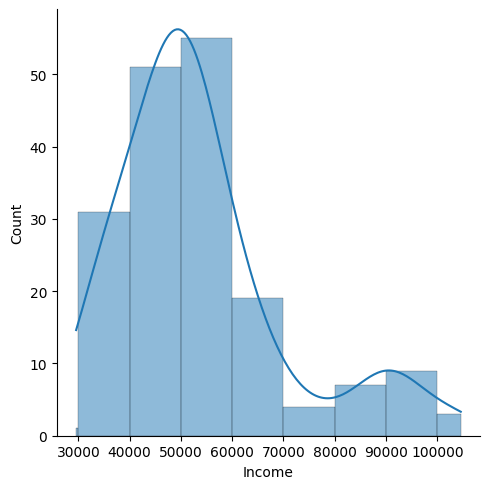

In [22]:
bin = [29562, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 104581]
sns.displot(df, x="Income", bins = bin, kde = True)
plt.show()

In [23]:
print(df['Miles'].min())
print(df['Miles'].max())

21
360


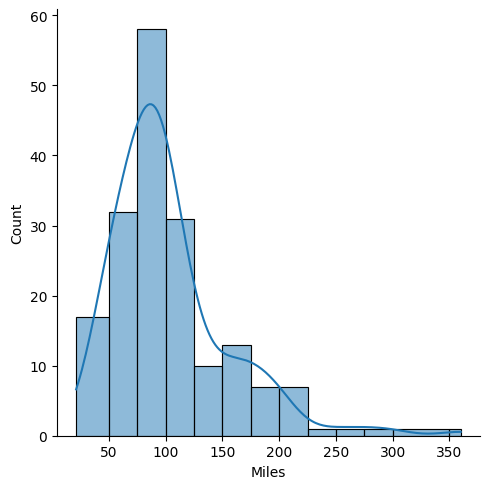

In [24]:
bin = [21, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 350, 360]
sns.displot(df, x="Miles", bins = bin, kde = True)
plt.show()

***The graphs above shows the data vaiablility. Higher the counts higher the number of that perticculer varible is avaible. Based on the graphs we can infer the conclusion as what to focus upon.***

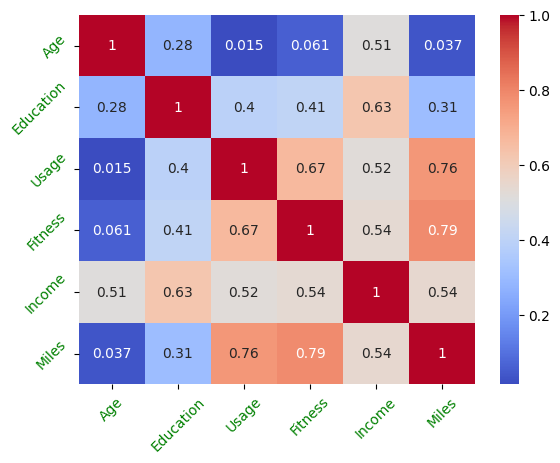

In [25]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45, color  = 'green')
plt.yticks(rotation = 45, color = 'green')
plt.show()

Herein it is very clear that fitness & age has very poor relationship. Also, the same is with Age & Miles. But these variables have stong relatnship with other variables.

From here at this point, we can go ahead with outlier abalysis. Though we have already checked the distribution of the variables above we can also have a look & remove the same uning boxpot & outlier detection techniques. 

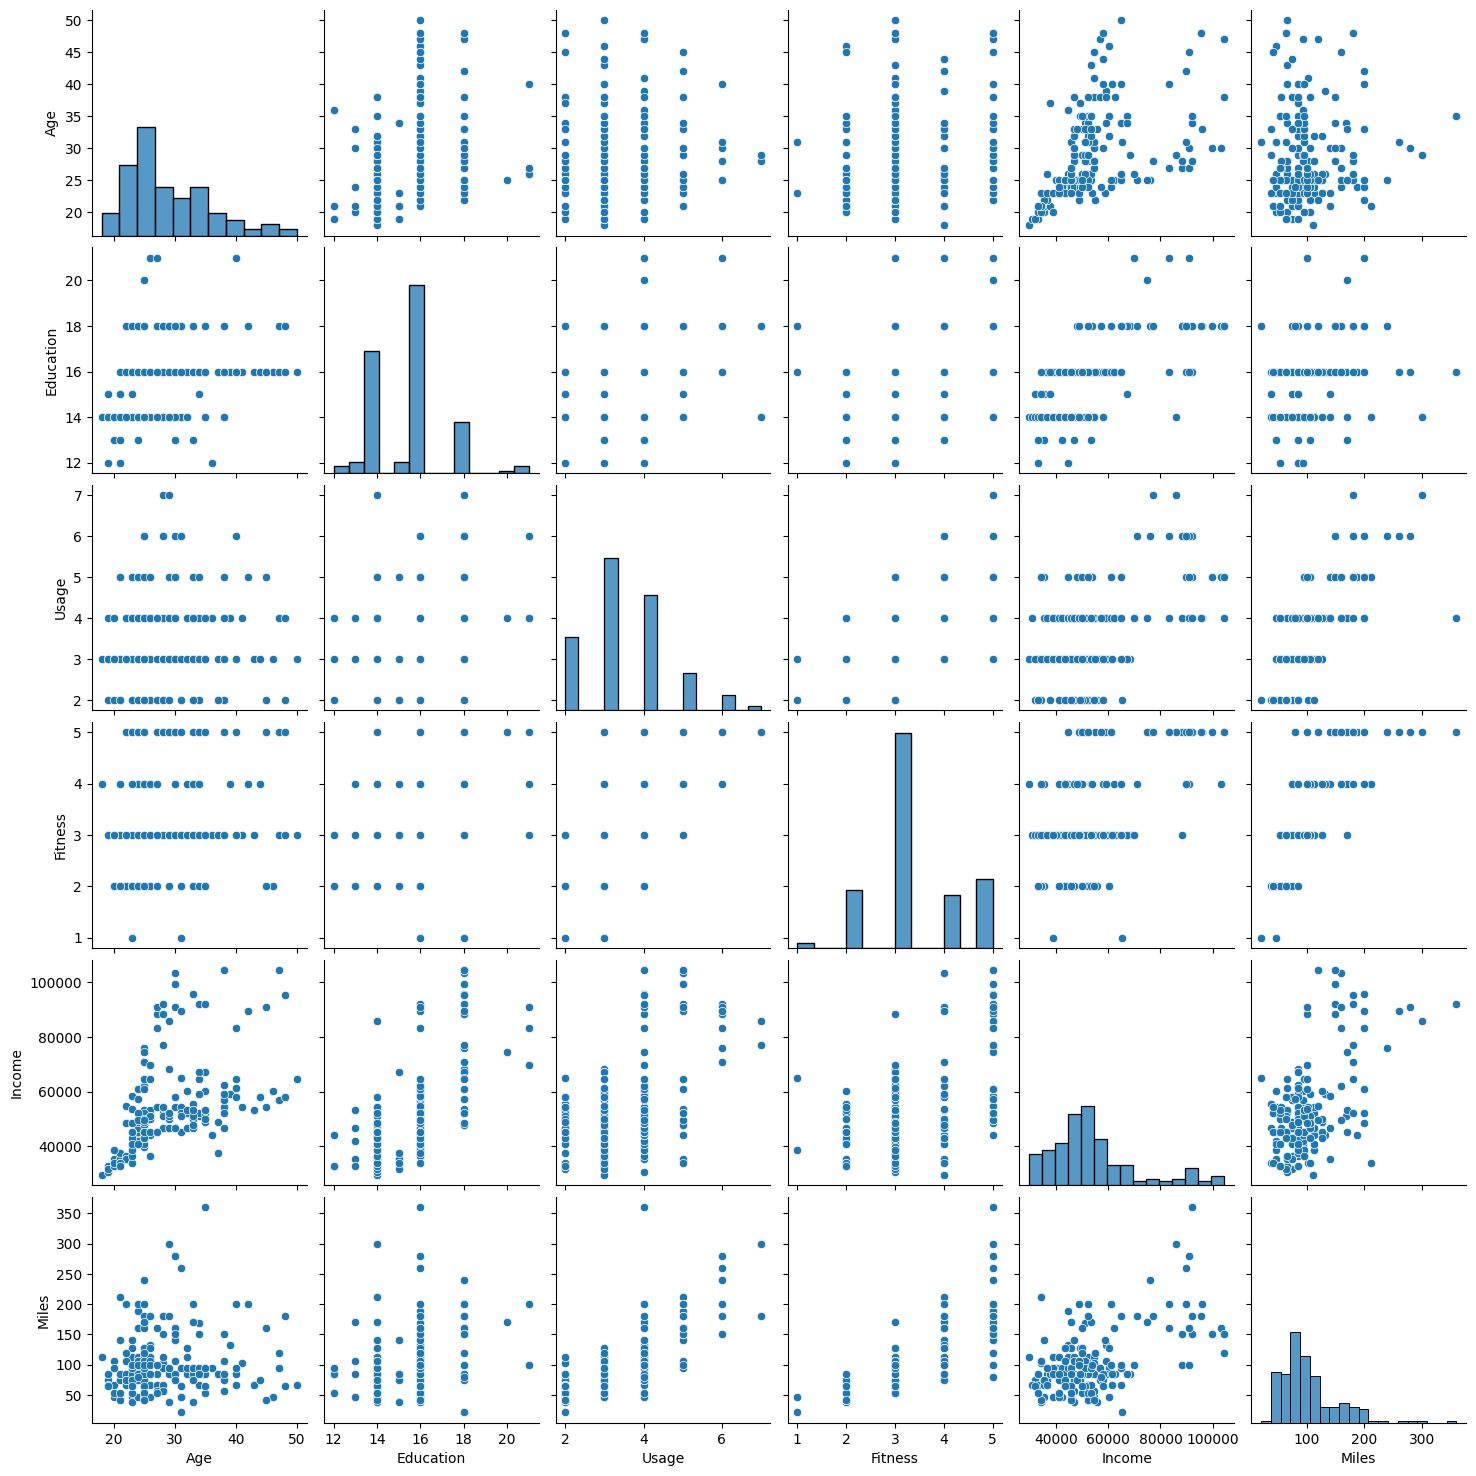

In [26]:
sns.pairplot(df)
plt.show()

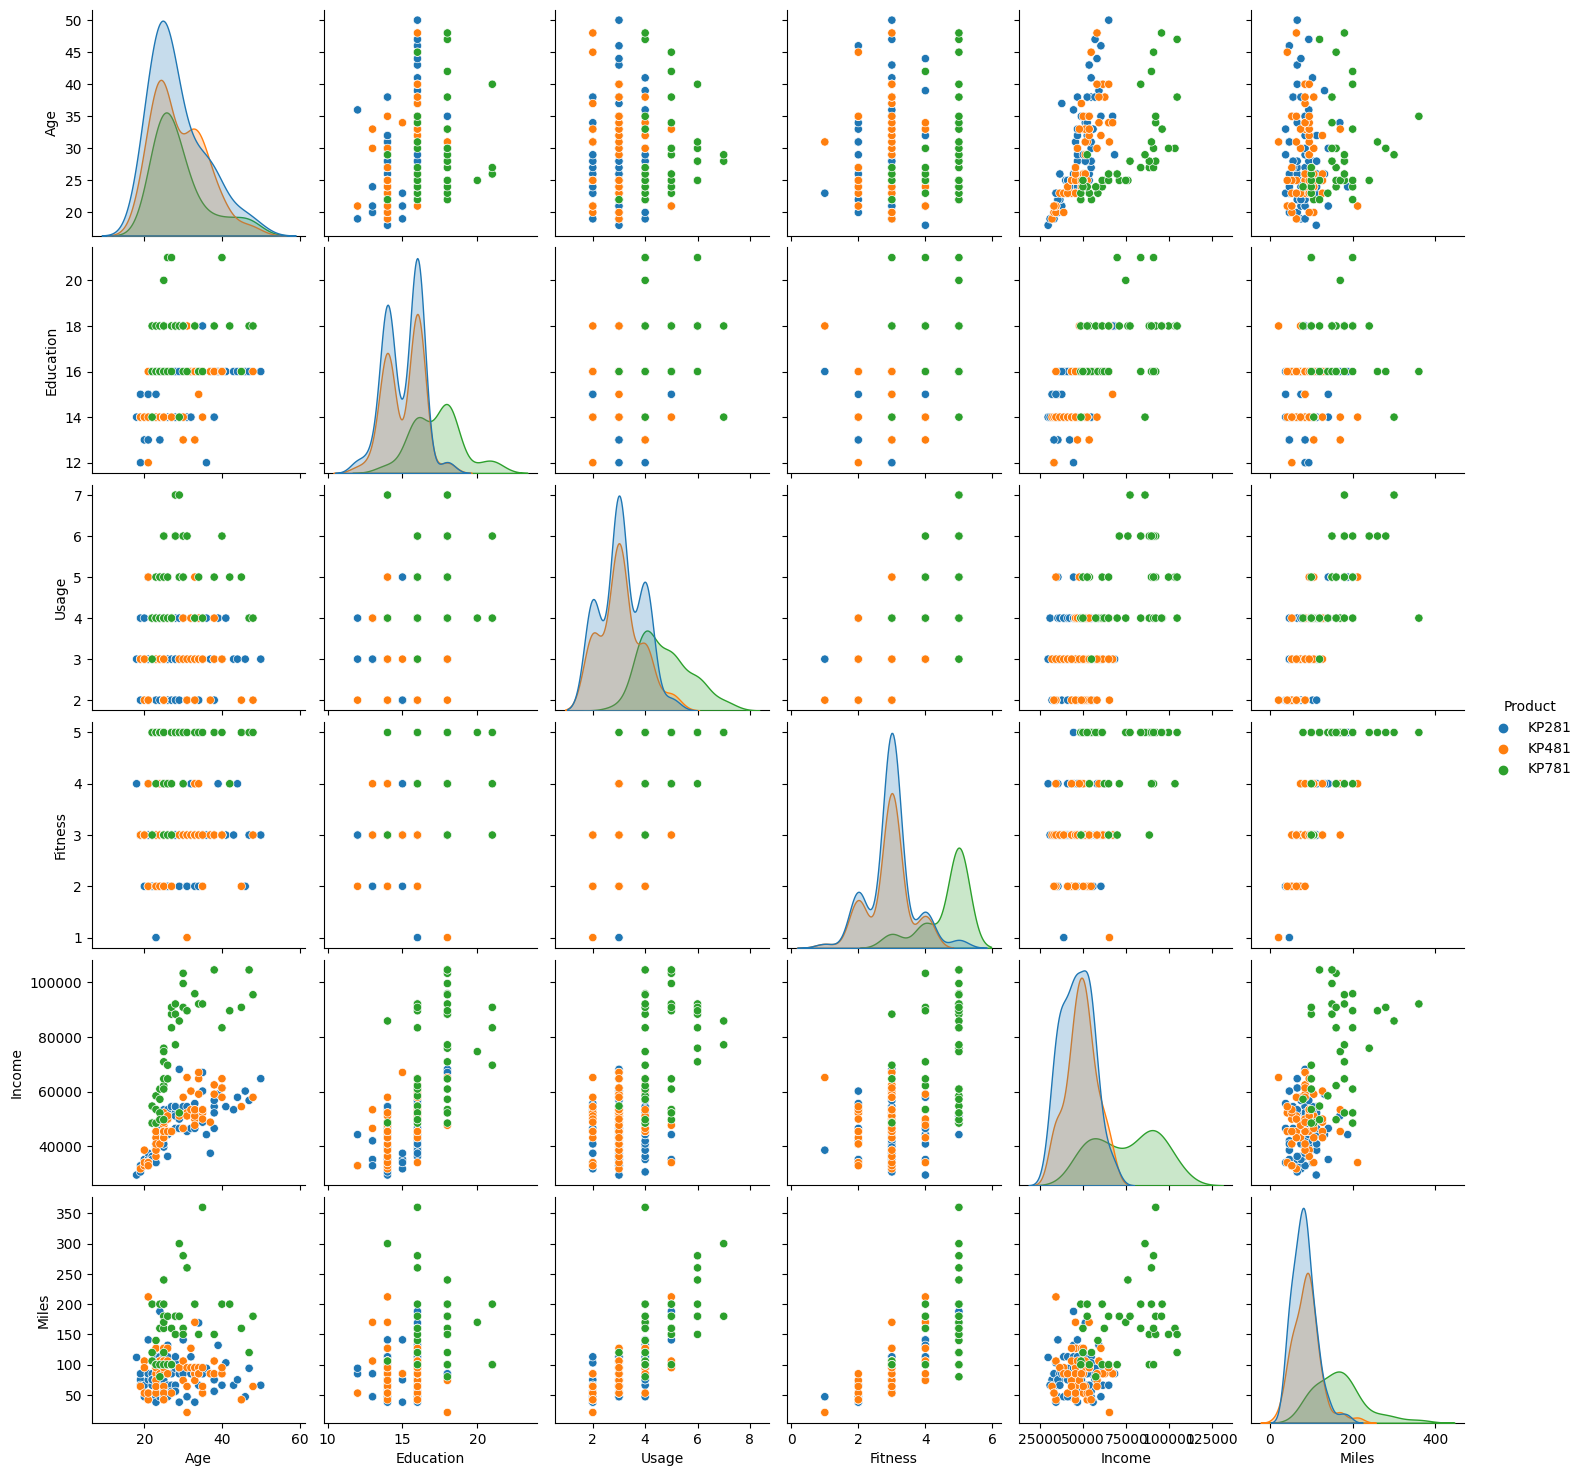

In [27]:
sns.pairplot(df, hue = 'Product')
plt.show()

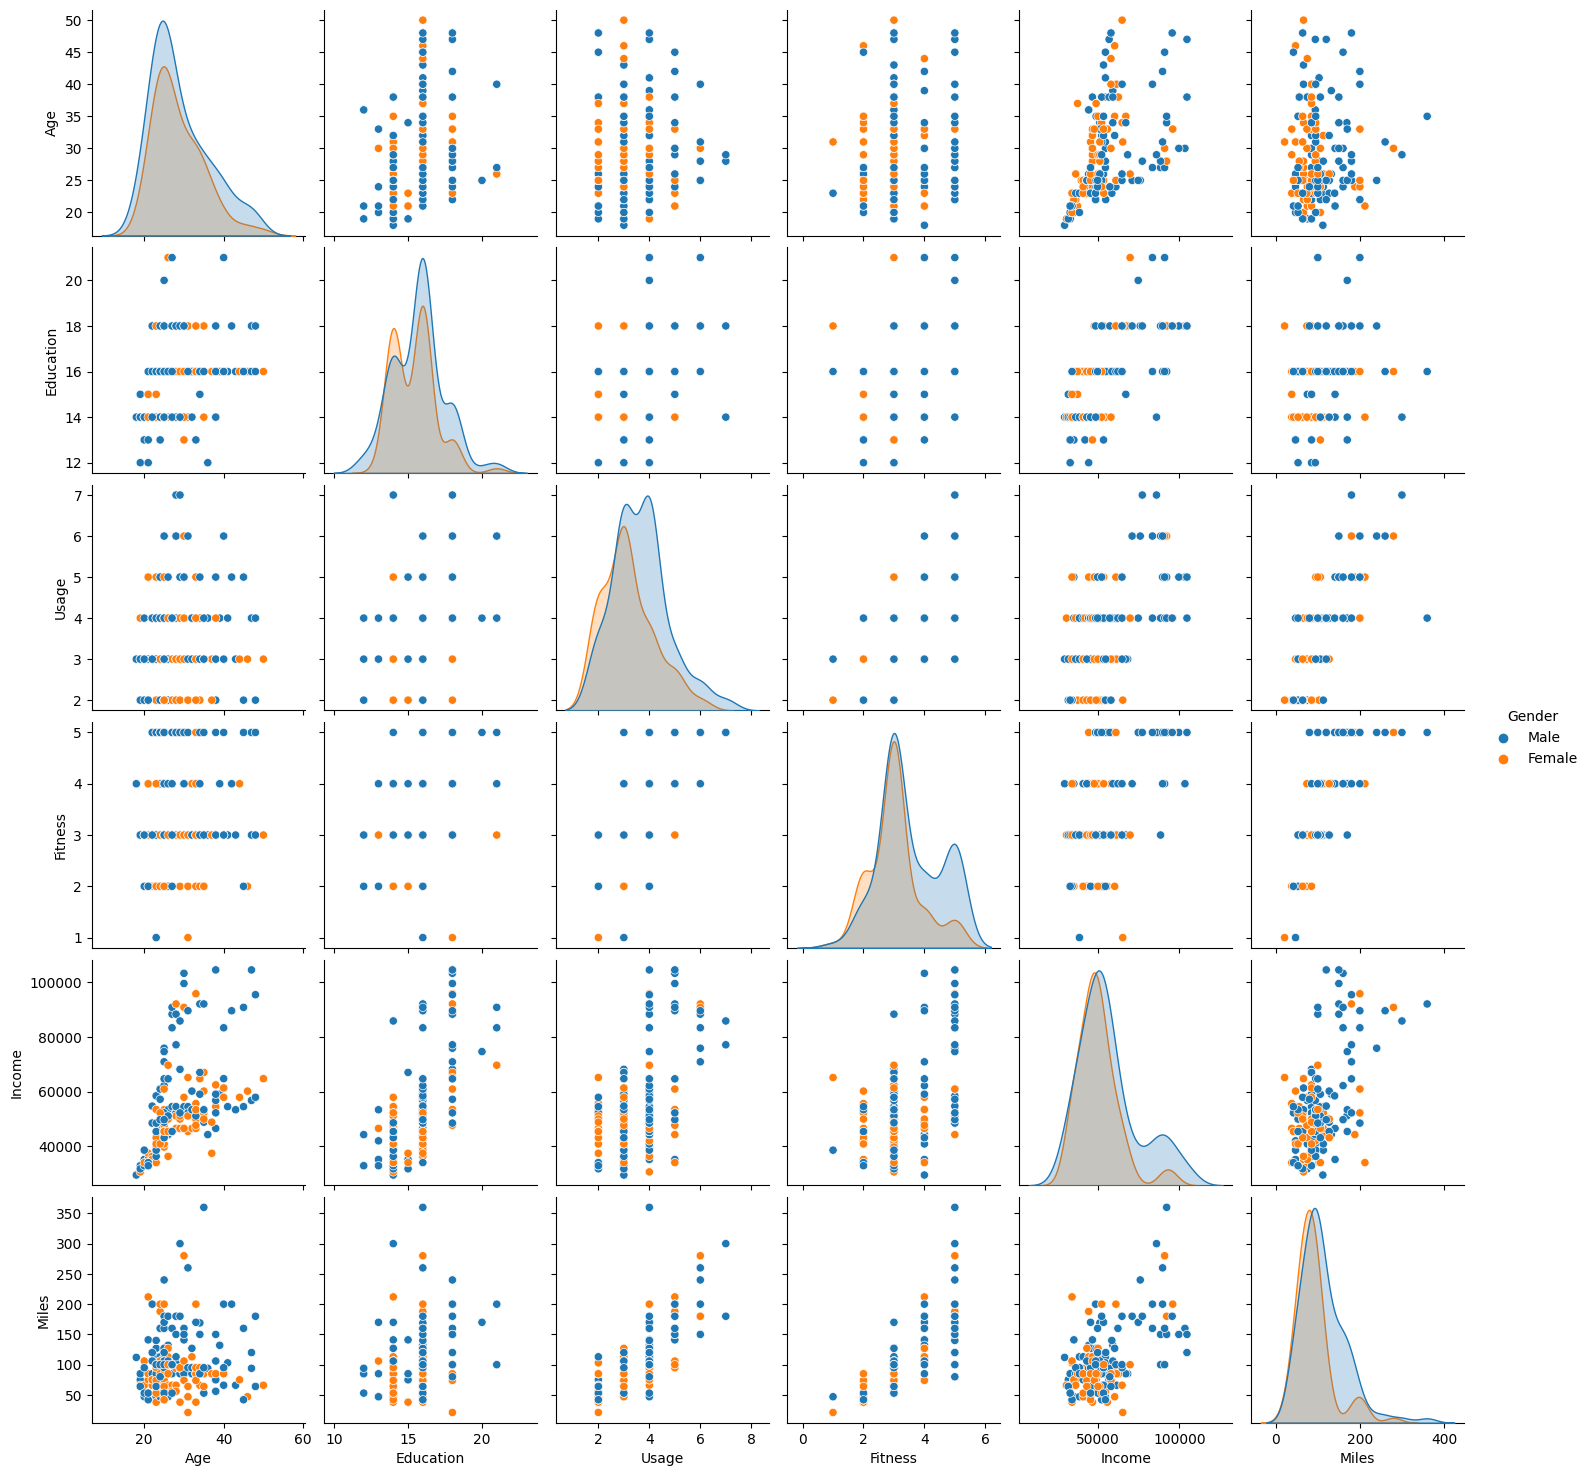

In [28]:
sns.pairplot(df, hue = 'Gender')
plt.show()

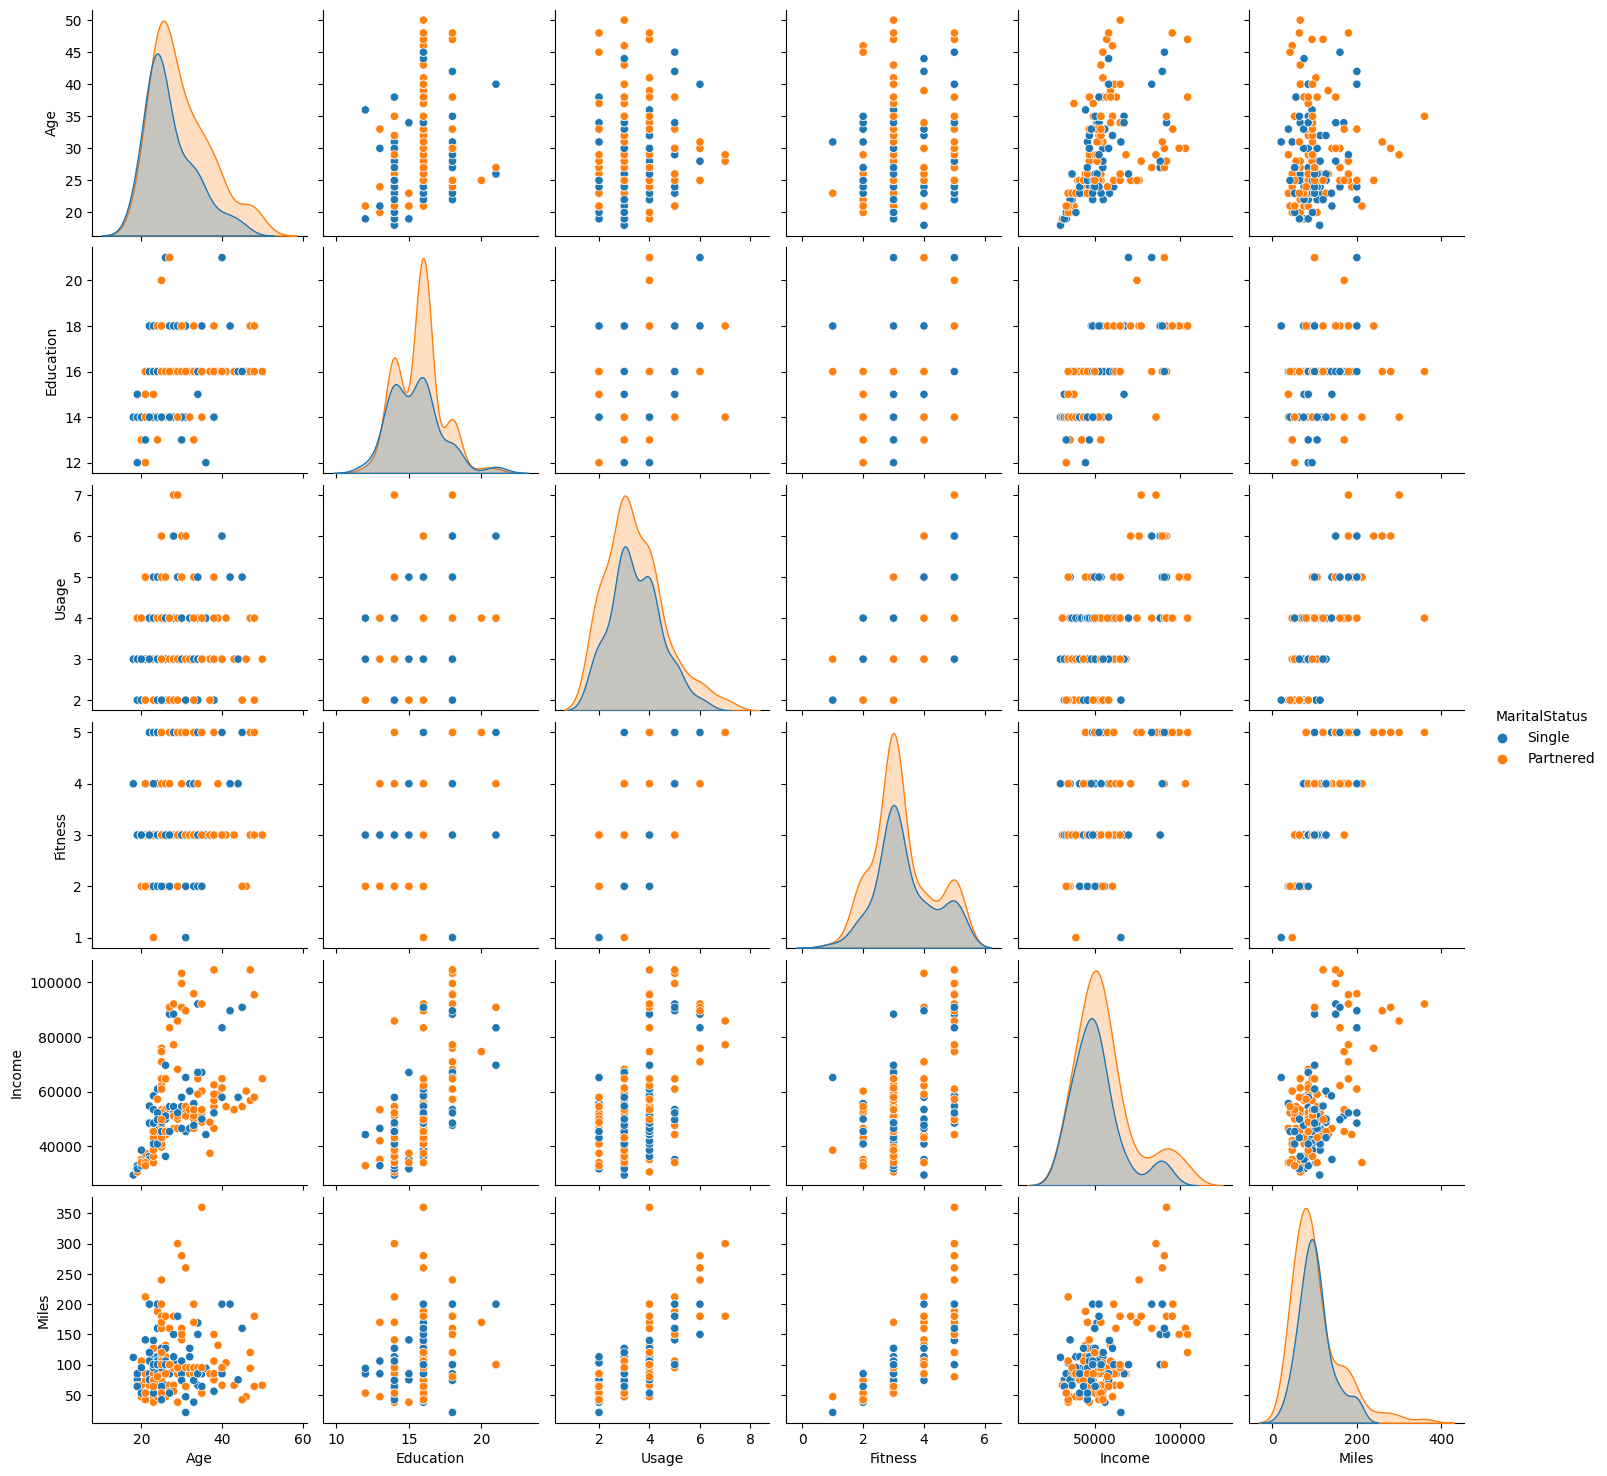

In [29]:
sns.pairplot(df, hue = 'MaritalStatus')
plt.show()

In [30]:
A = df.groupby(['Product', 'Gender']).agg({'Usage': 'mean'}).reset_index().sort_values(by = ['Usage'], ascending = False)
A

,Product,Gender,Usage
4,KP781,Female,5.000000
5,KP781,Male,4.727273
1,KP281,Male,3.275000
2,KP481,Female,3.137931
3,KP481,Male,3.000000
0,KP281,Female,2.900000


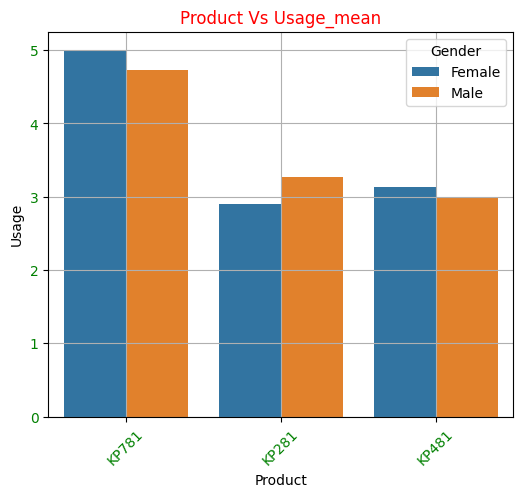

In [31]:
plt.figure(figsize = (6, 5))
sns.barplot(data  = A, 
         x = 'Product', 
         y = 'Usage', 
         hue = 'Gender')
plt.xticks(rotation=45,fontsize=10, color = 'green')
plt.yticks(rotation=0,fontsize=10, color = 'green')
plt.title("Product Vs Usage_mean", color = 'red')
plt.grid()
plt.show()

In [32]:
A = df.groupby(['Product', 'MaritalStatus']).agg({'Age': 'mean'}).reset_index().sort_values(by = ['Age'], ascending = False)
A

,Product,MaritalStatus,Age
2,KP481,Partnered,30.222222
4,KP781,Partnered,29.826087
0,KP281,Partnered,29.666667
5,KP781,Single,28.117647
3,KP481,Single,26.916667
1,KP281,Single,26.875000


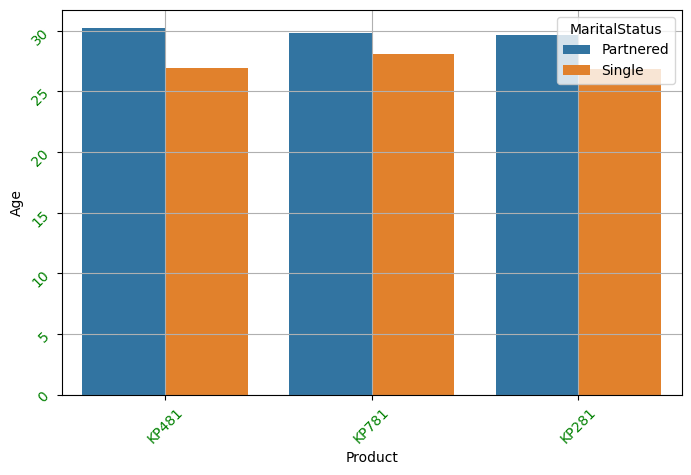

In [33]:
from seaborn._core.properties import FontSize
plt.figure(figsize = (8, 5))
sns.barplot(data = A,
            x = 'Product',
            y = 'Age',
            hue = 'MaritalStatus'
            )
plt.xticks(rotation = 45, fontsize = 10, color = 'green')
plt.yticks(rotation = 45, fontsize = 10, color = 'green')
plt.grid()
plt.show()

In [34]:
A = df.groupby(['Product', 'Education']).agg({'Income': 'mean'}).reset_index().sort_values(by = ['Income'], ascending = False)
A.head(2)

,Product,Education,Income
16,KP781,21,81341.000000
14,KP781,18,80186.315789


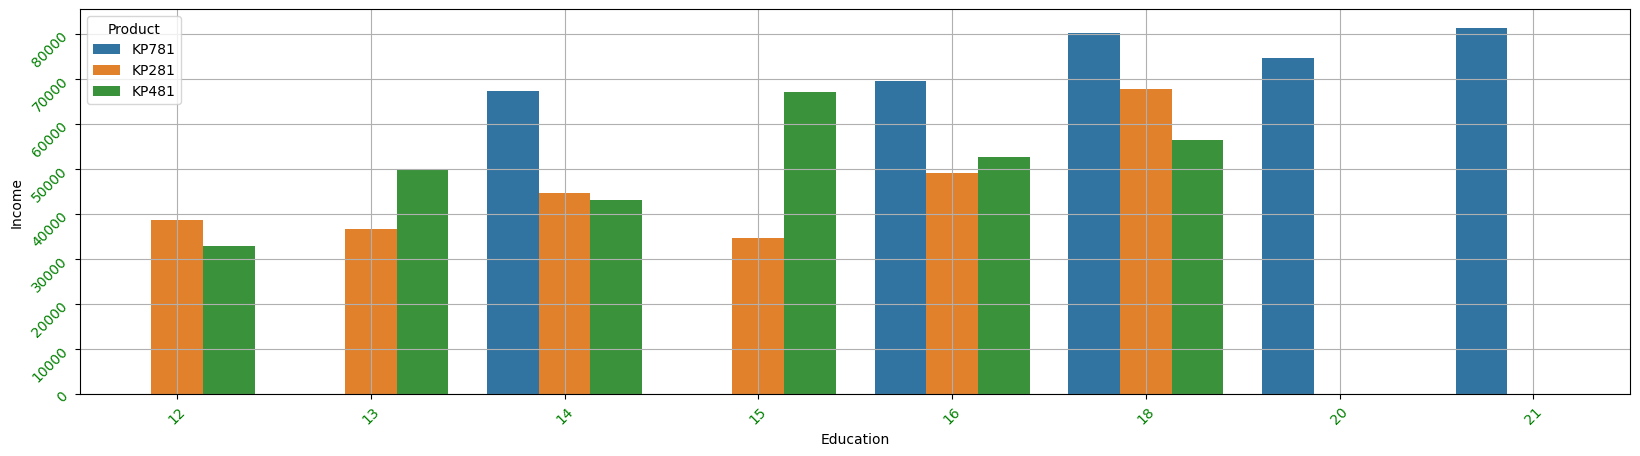

In [35]:
plt.figure(figsize = (20, 5))
sns.barplot(data = A,
            x = 'Education',
            y = 'Income',
            hue = 'Product')
plt.xticks(rotation = 45, fontsize = 10, color = 'green')
plt.yticks(rotation = 45, fontsize = 10, color = 'green')
plt.grid()
plt.show()

In [36]:
A = df.groupby(['Product']).agg({'Age':'mean', 'Miles':'mean'}).reset_index()
A

,Product,Age,Miles
0,KP281,28.55,82.787500
1,KP481,28.90,87.933333
2,KP781,29.10,166.900000


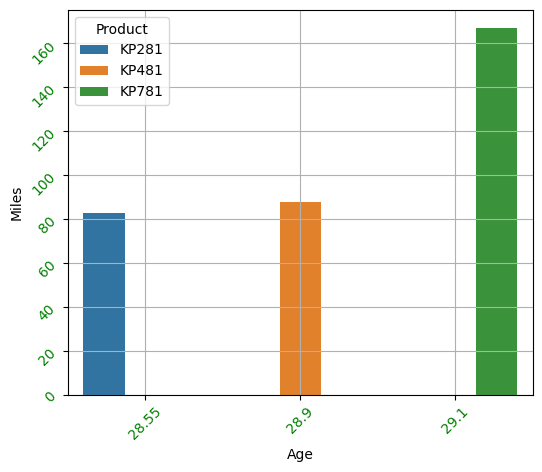

In [37]:
plt.figure(figsize = (6, 5))
sns.barplot(data =  A,
            x = 'Age',
            y = 'Miles',
            hue = 'Product')
plt.xticks(rotation = 45, fontsize = 10, color = 'green')
plt.yticks(rotation = 45, fontsize = 10, color = 'green')
plt.grid()
plt.show()

In [38]:
df.head(1)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112


In [39]:
A = df.groupby(['Product', 'Fitness']).agg({'Income': 'mean'}).reset_index()
A.head(5)

,Product,Fitness,Income
0,KP281,1,38658.000000
1,KP281,2,46779.428571
2,KP281,3,46659.111111
3,KP281,4,44974.666667
4,KP281,5,47754.000000


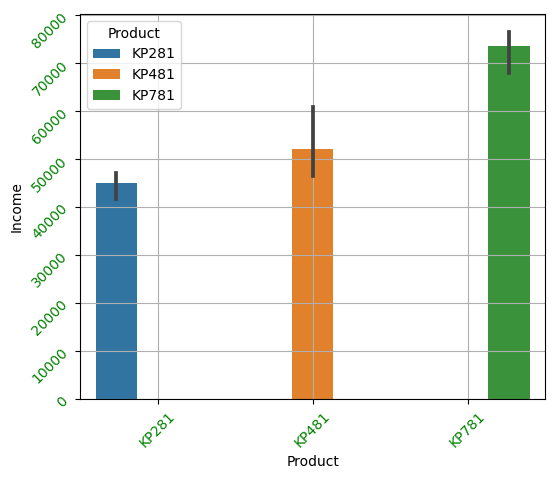

In [40]:
plt.figure(figsize = (6, 5))
sns.barplot(data =  A,
            x = 'Product',
            y = 'Income',
            hue = 'Product')
plt.xticks(rotation = 45, fontsize = 10, color = 'green')
plt.yticks(rotation = 45, fontsize = 10, color = 'green')
plt.grid()
plt.show()